# **Objective Of The Project :**

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

# **About Dataset**

The dataset consists of data of anonymous covid patients from mexico. It has their medical history and medical status at that particular time. ***In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.*** The respective columns mean:

1. sex: 1 for female and 2 for male.
2. age: of the patient.
3. classification: Covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. pneumonia: whether the patient already have air sacs inflammation or not.
6. pregnancy: whether the patient is pregnant or not.
7. diabetes: whether the patient has diabetes or not.
8. copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
9. asthma: whether the patient has asthma or not.
10. inmsupr: whether the patient is immunosuppressed or not.
11. hypertension: whether the patient has hypertension or not.
12. cardiovascular: whether the patient has heart or blood vessels related disease.
13. renal chronic: whether the patient has chronic renal disease or not.
14. other disease: whether the patient has other disease or not.
15. obesity: whether the patient is obese or not.
17. tobacco: whether the patient is a tobacco user.
18. usmr: Indicates whether the patient treated medical units of the first, second or third level.
19. medical unit: type of institution of the National Health System that provided the care.
20. intubed: whether the patient was connected to the ventilator.
21. icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
22. date died: If the patient died indicate the date of death and 9999-99-99 otherwise.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code mounts our Google Drive to Google Colab notebook and it allows us to access files on our Google Drive directly from the Colab notebook.

**DIRECTLY LINK KAGGLE ACCOUNT TO DOWNLOAD FILES**

In [ ]:
! pip install kaggle 
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here we linked Kaggle platform directly to colab notebook, so that we can directly load dataset and perform analysis on it.

**DOWNLOAD DATASET FROM KAGGLE**

In [ ]:
! kaggle datasets download -d meirnizri/covid19-dataset
! unzip covid19-dataset.zip

  0% 0.00/4.66M [00:00<?, ?B/s]
100% 4.66M/4.66M [00:00<00:00, 107MB/s]
Archive:  covid19-dataset.zip
  inflating: Covid Data.csv          


**IMPORT NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


**LOAD DATASET**

In [ ]:
data = pd.read_csv('/content/Covid Data.csv')
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


After loading dataset we observed that this data is either int or float type and there is no object data. This helps us get a general idea of structure of dataset.

**CHECK DIMENSIONS OR SHAPE OF DATA**

In [ ]:
data.shape

(1048575, 21)

In this dataset we have, number of rows =1048575 and number of columns =21

In [ ]:
data.size

22020075

It returns the total number of elements in the DataFrame, which is the product of the number of rows and the number of columns(i.e, 1048575*21=22020075)

**TO KNOW DATATYPE OF EACH ATTRIBUTE** 

In [ ]:
data.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

It clearly mentions that all column values are in int64 except for DATE_DIED column which have object type value.

**CHECK DATASET INFO**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

It provides a summary of the data, including the data types, non-null value count and memory usage.
According to this there is no null value in any of the column (i.e, total number of values in each column are equal to 1048575)

Here it is showing we have no null values. We have no NaN values but we have missing values.

**TO SEE NUMBER OF UNIQUE VALUES IN EACH COLUMN**

In [ ]:
data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

It clearly shows column ***MEDICAL_UNIT*** with 13 unique values, ***DATA_DIED*** column with 401 unique values and ***AGE*** column with 121 unique values. So, these columns have continuous data, rest all the columns have categorical data.  

**GET STATISTICAL SUMMARY OF DATASET**

In [ ]:
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


 It provides descriptive statistics for each column in the data. It gives summary of the central tendency, dispersion and shape of the distribution of each column's values.

In [ ]:
data.corr()

<ipython-input-12-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


It is used to compute pairwise correlation of columns in the data. It returns a correlation matrix, where each value represents the correlation coefficient between two columns.

The correlation coefficient ranges from -1 to 1, indicating the strength and direction of the relationship between the variables.

**PLOT HEATMAP**

<ipython-input-13-014a00a5ee07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap='Reds', annot = True)


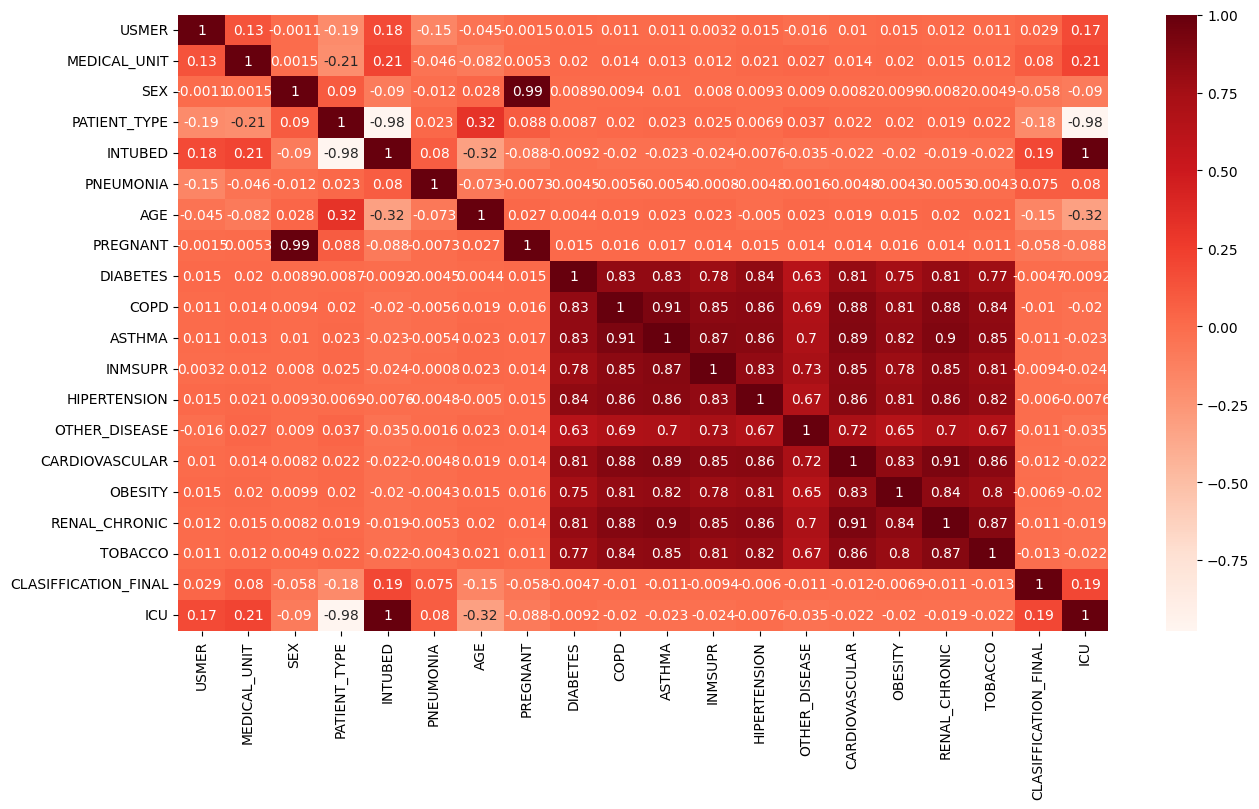

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
dataplot = sns.heatmap(data.corr(), cmap='Reds', annot = True)

Darker colors indicate negative correlation whereas, lighter colors indicate positive correlation.

As we can observe from diagram above 1 represents highest negative correlation and -0.98 represents highest positive correlation. 

**Missing value analysis of "INTUBED" feature**

<Axes: xlabel='INTUBED', ylabel='count'>

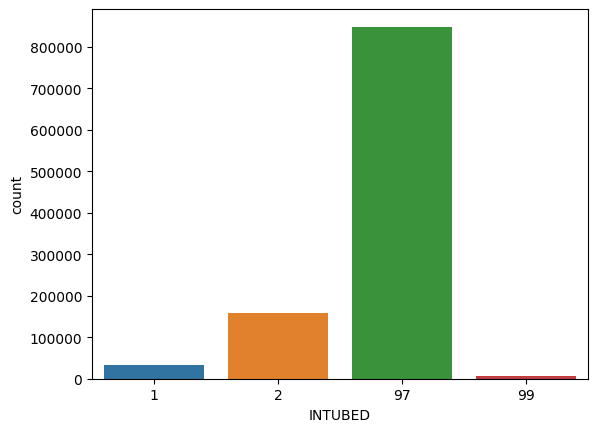

In [ ]:
sns.countplot(x = 'INTUBED', data=data)

This plot clearly shows that INTUBED column have so many missing values. As 97 is nothing but NaN value.

**Missing value analysis of "ICU" feature**

<Axes: xlabel='ICU', ylabel='count'>

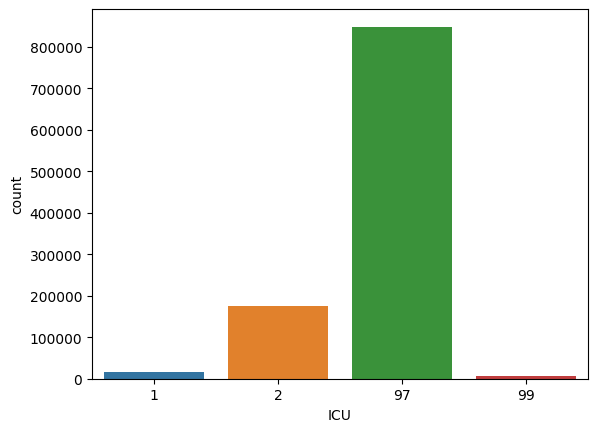

In [ ]:
sns.countplot(x = 'ICU', data=data)

Similarly, this count plot depicts that ICU column have alot of missing values. As 97 is nothing but missing value.

**Now, let us see how many rows are such where there are missing values in data, i.e. the value is either 97 and 99.**

In [ ]:
data = data.replace([97,99], np.nan)
mm = data[data.isnull().all(axis=1)]
data.iloc[list(mm.index)]
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65.0,2.0,2,...,2,2,1,2,2,2,2,2,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72.0,NaN,2,...,2,2,1,2,2,1,1,2,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,NaN,1,...,2,2,2,2,2,2,2,2,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53.0,2.0,2,...,2,2,2,2,2,2,2,2,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68.0,NaN,1,...,2,2,1,2,2,2,2,2,3,NaN


In [ ]:
data.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so I will take this feature as a "DEATH" that includes wether the patient died or not.

**PREPARING DATE_DIED COLUMN**

In [ ]:
data['DEATH'] = [2 if i=='9999-99-99' else 1 for i in data['DATE_DIED']]

In [ ]:
# Now we can remove the DATE_DIED field
data.drop(columns=['DATE_DIED'], inplace=True)

As, 'DATE_DIED' column which is now reffered as 'DEATH' column because this column is our target variable and so it should be categorical column so I had to convert '9999-99-99' values to make this column ready for analysis. 

**CHECK MISSING VALUES IN DATA**

In [ ]:
data.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                        221
PREGNANT                523511
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     856032
DEATH                        0
dtype: int64

As total number of values in each column are 1048575 and(***INTUBED=855869, PREGNANT=523511, ICU=856032***) these columns have more than 50% of missing values, so we will drop these columns.

**DROP UNWANTED COLUMNS**

In [ ]:
data = data.drop(columns=['INTUBED', 'PREGNANT', 'ICU'])

In [ ]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

In [ ]:
data.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
PNEUMONIA               16003
AGE                       221
DIABETES                    0
COPD                        0
ASTHMA                      0
INMSUPR                     0
HIPERTENSION                0
OTHER_DISEASE               0
CARDIOVASCULAR              0
OBESITY                     0
RENAL_CHRONIC               0
TOBACCO                     0
CLASIFFICATION_FINAL        0
DEATH                       0
dtype: int64

Now only AGE and PNEUMONIA column have missing values so I am applying ***Mode*** to Pneumonia column and ***Median*** to Age column columns.

**FILL MISSING VALUES** 

In [ ]:
data['PNEUMONIA'] = data['PNEUMONIA'].fillna((data['PNEUMONIA'].mode()[0]))
data['AGE'] = data['AGE'].fillna((data['AGE'].median()))


In [ ]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

It simply displays total number of columns currently present in dataset along with there names in the form of list. 

In [ ]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
DEATH                   0
dtype: int64

Now, no column have missing values and datatype of every column is int64. 

**EXPLORATORY DATA ANALYSIS(EDA)**

**Analyzing Death rate according to the Obesity**

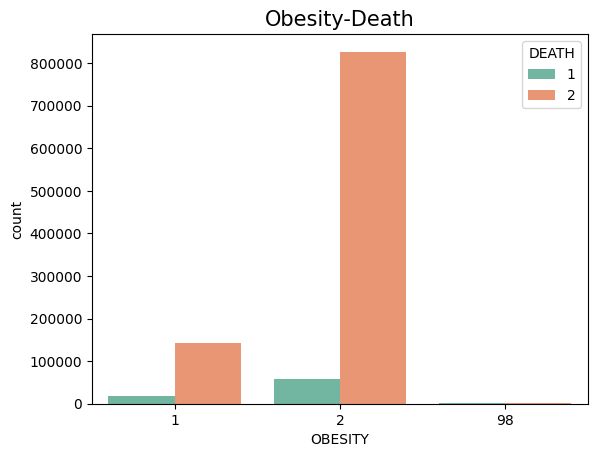

In [ ]:
sns.countplot(x ='OBESITY', hue = "DEATH", data = data, palette = "Set2")
plt.title("Obesity-Death",fontsize=15, color="black")
plt.show()

Obese patients are more likely to die from covid as compared to non-obese patients.

 **Analyzing Death rate according to the Sex** 

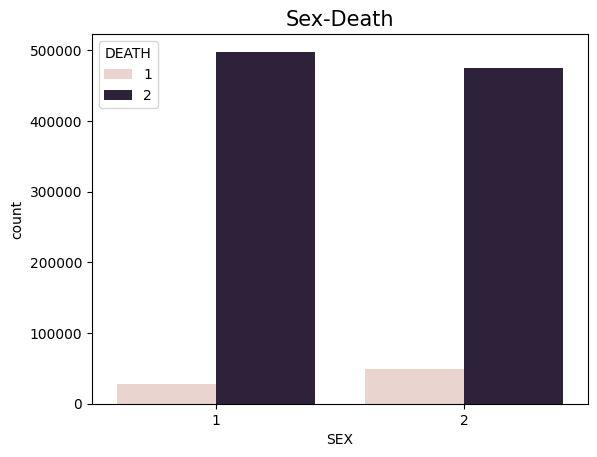

In [ ]:
sns.countplot(x ='SEX', hue = "DEATH", data = data, palette = sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=15, color="black")
plt.show()

Death rate of males is more in comparison to females.

**TO CHECK IF CONTINUOUS VARIABLE IN DATASET IS FOLLOWING NORMAL DISTRIBUTION**

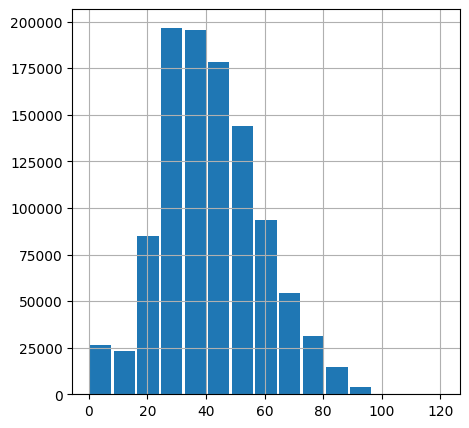

In [ ]:
data['AGE'].hist(bins=15, figsize=(5,5), grid = True, rwidth = 0.9)
plt.show()

By simply looking at this histogram, we can tell that the age column does not exhibit a “bell-shape” and is not normally distributed.

Also it clearly shows majority of patients are roughly between 20-60 years old

**WORKING ON OUTLIERS**

Here, we will be doing Outlier Detection by ***Interquartile Range (IQR)*** as data is not normally distributed

<Axes: >

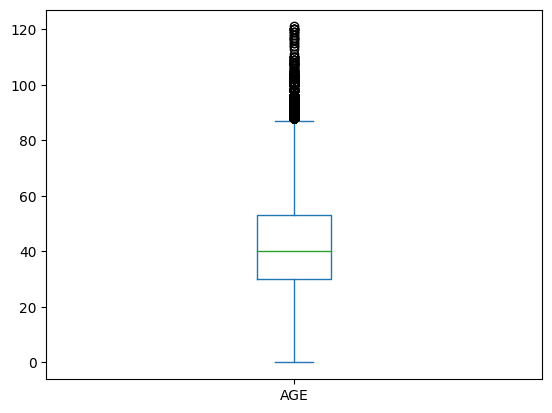

In [ ]:
data['AGE'].plot(kind = "box") # Check Boxplots for outlier presence in continuous variable

This box plot clearly shows that AGE column have outliers so I will calculate IQR range of AGE column and from that will check number of outliers in that specific column, then apply filters to remove outliers and at last will check whether the outliers are removed or not.

In [ ]:
min(data['AGE'])

0.0

In [ ]:
max(data['AGE'])

121.0

***Calculate IQR range for Age column - only continuous variable in data***

In [ ]:
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3-Q1
IQR

23.0

***Check number of outliers in Age column***

In [ ]:
print(((data['AGE'] < (Q1 - 1.5 * IQR)) | (data['AGE'] > (Q3 + 1.5 * IQR))). sum())

5419


***Add Filter to remove outliers***

In [ ]:
data = data[~((data['AGE'] < (Q1 - 1.5 * IQR)) | (data['AGE'] > (Q3 + 1.5 * IQR)))]
data.shape

(1043156, 18)

***Check if outliers from age column are removed***

In [ ]:
print(((data['AGE'] < (Q1 - 1.5 * IQR)) | (data['AGE'] > (Q3 + 1.5 * IQR))). sum())

0


**NORMALITATION/SCALING OF NUMERICAL DATA COLUMN**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'age' column
data['AGE_norm'] = scaler.fit_transform(data[['AGE']]) 
data['AGE_norm'].head()


0    0.747126
1    0.827586
2    0.632184
3    0.609195
4    0.781609
Name: AGE_norm, dtype: float64

Normalising AGE column as this is the only numerical column.

**CONCATENATING FEATURES AND SEPERATE TARGET AND FEATURES**

In [ ]:
# Concatenate the normalized 'age' column with the other feature columns
x = pd.concat([data[['AGE_norm']], data[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL']]], axis=1)

# Assign the target variable to y
y = data['DEATH']

x.head()

,AGE_norm,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,0.747126,2,1,1,1,1.0,2,2,2,2,1,2,2,2,2,2,3
1,0.827586,2,1,2,1,1.0,2,2,2,2,1,2,2,1,1,2,5
2,0.632184,2,1,2,2,2.0,1,2,2,2,2,2,2,2,2,2,3
3,0.609195,2,1,1,1,2.0,2,2,2,2,2,2,2,2,2,2,7
4,0.781609,2,1,2,1,2.0,1,2,2,2,1,2,2,2,2,2,3


At first we are concatenating normalised age column with rest of features.

Here, we seperate Target variable(***DEATH***) from Features to apply classification model to find accuracy of data.

***'x' represents features or independent variables and 'y' represents target or dependent variable.***

**Check Distribution of Target Variable**

In [ ]:
y.value_counts()

2    968031
1     75125
Name: DEATH, dtype: int64

Outcomes show that target variable has imbalanced distribution; therefore, upsampling can be applied to create a balanced dataset

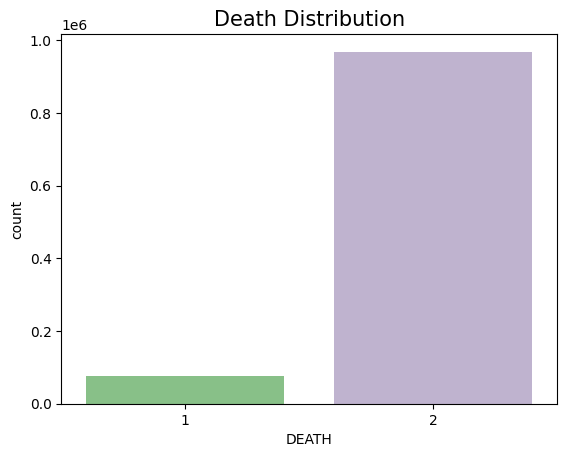

In [ ]:
sns.countplot(x ='DEATH', data = data, palette = "Accent")
plt.title("Death Distribution", fontsize=15,color="black")
plt.show()

It is very clear from the plot that DEATH column is imbalanced. So, we are applying SMOTE Upsampling.

**APPLY SMOTE UPSAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_x1, sm_y1 = sm.fit_resample(x,y)

In [ ]:
sm_y1.value_counts()

1    968031
2    968031
Name: DEATH, dtype: int64

Here I applied SMOTE Upsampling method to make DEATH column balanced so that I can do further analysis on it.

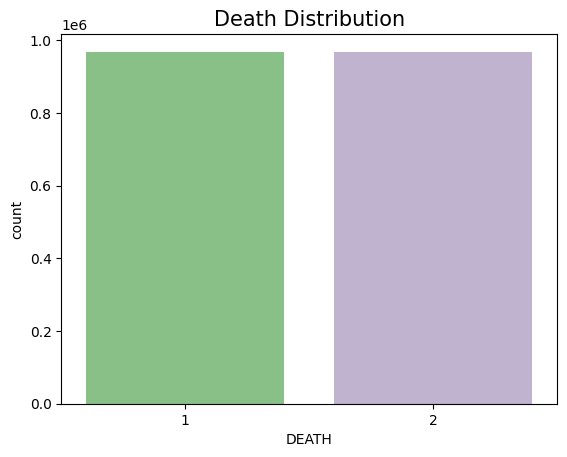

In [ ]:
sns.countplot(x=sm_y1, data=data, palette = "Accent")
plt.title("Death Distribution", fontsize=15,color="black")
plt.show()

Here we can clearly see that after upsampling DEATH column is balanced.

**BUILDING CLASSIFICATION MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sm_x1,sm_y1, test_size=0.2, random_state=42)
print("Train_x :",x_train.shape)
print("Test_x :",x_test.shape)
print("Train_y :",y_train.shape)
print("Test_y :",y_test.shape)

Train_x : (1548849, 17)
Test_x : (387213, 17)
Train_y : (1548849,)
Test_y : (387213,)


The resulting data is split into X_train (training features), X_test (testing features), y_train (training target) and y_test (testing target), according to the specified test size and random state.

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
dct_fit = model.fit(x_train, y_train)
y_pred = dct_fit.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
Accuracy = accuracy_score(y_test, y_pred)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: ', Accuracy)
print('Classification Report: ', classification_report(y_test, y_pred))
print('Confusion Matrix ', Confusion_Matrix)

Accuracy:  0.9499706879676044
Classification Report:                precision    recall  f1-score   support

           1       0.93      0.97      0.95    193756
           2       0.97      0.93      0.95    193457

    accuracy                           0.95    387213
   macro avg       0.95      0.95      0.95    387213
weighted avg       0.95      0.95      0.95    387213

Confusion Matrix  [[187475   6281]
 [ 13091 180366]]


This code calculates the accuracy score, confusion matrix, and classification report for the predictions made by the decision tree classifier.

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)


In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9412209817335678
Classification Report:               precision    recall  f1-score   support

           1       0.93      0.96      0.94    193756
           2       0.96      0.93      0.94    193457

    accuracy                           0.94    387213
   macro avg       0.94      0.94      0.94    387213
weighted avg       0.94      0.94      0.94    387213

Confusion Matrix: [[185416   8340]
 [ 14420 179037]]


# **Conclusion**

1. In this project I predicted "Death" situation with more than 90% accuracy by using just two algorithms.
       Decision Tree Classifier Score :- 95 %
       Random Forest Classifier Score :- 94 %
2. The important part of this project was solving the imbalance dataset problem, which I figured it out with **SMOTE Upsampling** method.
3. So through problem statement our classification model are performing very good performance to find solution on our problem statement.